In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import pickle
from fdd import OperationMode
from fdd import FDD

import scipy.io
from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.mixture import PGMM
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LogNorm
from sklearn.grid_search import GridSearchCV
from time import time

In [2]:
# Load Tennessee Eastman Process Data
original_data = pickle.load( open( "data/tep_data.dat", "rb" ) )
original_normal_data = original_data["Normal"]
original_normal_data.shape

(721, 22)

In [3]:
def create_dynamic_data(data, delays):
    final_data = data
    for delay in delays:
        b = np.roll(data, delay, axis=0)
        final_data = np.hstack((final_data, b))
    return final_data[np.max(delays):, :]

In [4]:
complete_data = original_data
# delays = [1]
# for key in original_data:
#     complete_data[key] = create_dynamic_data(original_data[key], delays)
x_normal = complete_data["Normal"]

In [5]:
fdd = FDD(name='TEPFDD',
          training_type='spark',
          n_components=np.array([1, 2, 3, 4, 5, 6, 7, 8]),
          n_pc=np.array([14]),
          covar_types=np.array([7]),
          n_jobs=16)
fdd.fdd(x_normal)

There is no model registered, creating a normal one.


False

In [6]:
fdd.fdd(x_normal)

Normal operation condition detected.


False

In [7]:
x_fault1 = complete_data["Fault1"]
fdd.fdd(x_fault1)

Out of normal operation condition detected.
The best fitting model found was: Normal Condition
True
620
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=1, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
1.0


True

In [8]:
fdd.fdd(x_fault1)

Out of normal operation condition detected.
The best fitting model found was: Fault1
False
6
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)


True

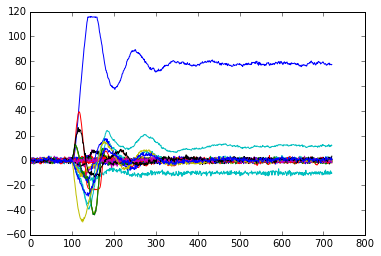

In [9]:
x_fault = complete_data["Fault1"]
plt.plot(x_fault)

In [10]:
for key in complete_data:
    print key

Fault18
Fault19
Normal
Fault10
Fault12
Fault13
Fault14
Fault17
Fault2
Fault1
Fault20
Fault8
